#  IPL First Innings Score Prediction 

In [156]:
import os
import numpy as np
import pandas as pd
# loading the dataset
df = pd.read_csv(r'C:\Users\seela\OneDrive\Documents\\ipl.csv')

In [157]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [158]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [159]:
print("-------- Match Dataset --------")
df.info()

-------- Match Dataset --------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [160]:
print("venue: {}".format(df['venue'].nunique()))
print(df['venue'].unique())

venue: 35
['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai International Cricket Stadium'
 'Maharashtra Cricket Association Stadium'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Saurashtra Crick

# **Data Cleaning**
 Points covered under this section: </br>
 • Removing unwanted columns</br>
 • Keeping only consistent teams</br>
 • Removing the first 5 overs data in every match</br>
 • Converting the column 'date' from string into datetime object</br>

In [161]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [162]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [163]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [164]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [165]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [166]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [167]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [168]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [169]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [170]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


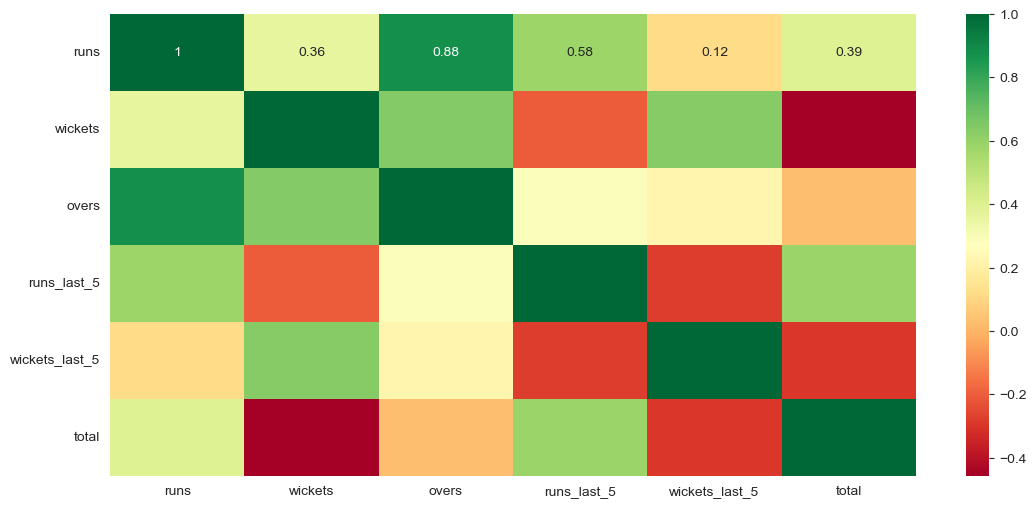

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' containing your dataset
# 'df' should contain all the features for which you want to visualize the correlation

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Get correlation of all the features of the dataset
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(13, 6))
g = sns.heatmap(data=corr_matrix, annot=True, cmap='RdYlGn')
plt.show()


# Data Preprocessing
• Handling categorical features </br>
• Splitting dataset into train and test set on the basis of date

In [172]:
#Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [173]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [174]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [175]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)


print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [176]:
X_train

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.1,61,0,59,0
33,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.2,61,1,59,1
34,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.3,61,1,59,1
35,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.4,61,1,59,1
36,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.5,61,1,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,19.2,194,7,54,4
68858,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,19.3,200,7,56,4
68859,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,19.4,201,7,56,4
68860,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,19.5,202,7,57,4


In [177]:
y_train

array([222, 222, 222, ..., 208, 208, 208], dtype=int64)

# Model Building
I will experiment with 5 different algorithms, they are as follows:</br>
• Linear Regression </br>
• Decision Tree Regression </br>
• Random Forest Regression </br>
• Ridge Regression </br>

 ----- Boosting Algorithm ----- </br>
• Adaptive Boosting (AdaBoost) Algorithm </br>

# *Linear Regression*

In [178]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [179]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [180]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.11861754619329
Mean Squared Error (MSE): 251.00792310417415
Root Mean Squared Error (RMSE): 15.843229566732099


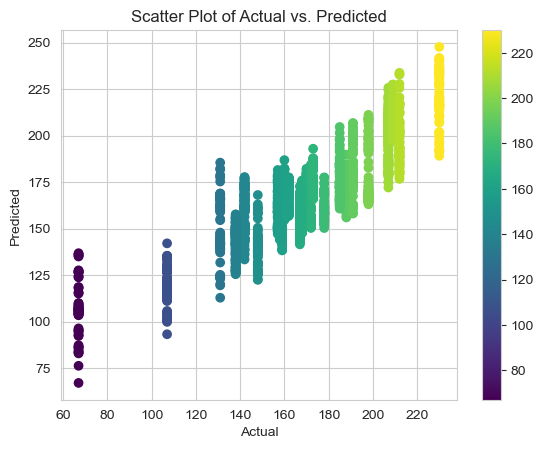

In [181]:
# Assuming you have defined y_test and  y_pred_lr earlier

from matplotlib import pyplot as plt
from matplotlib import cm

# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(y_test,y_pred_lr, c=y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

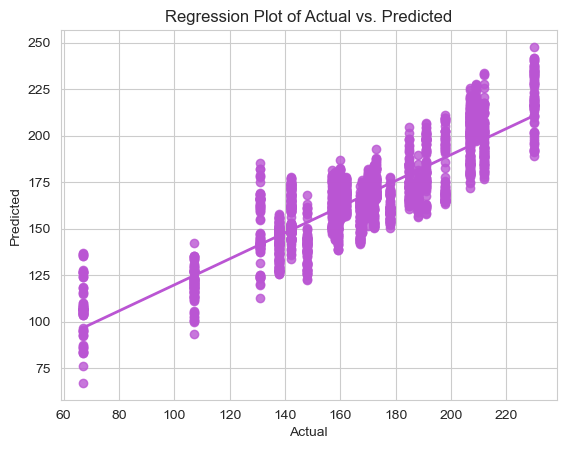

In [182]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=y_test, y= y_pred_lr, ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

In [183]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_lr,'Difference':y_test-y_pred_lr})
pred_df

,Actual Value,Predicted Value,Difference
0,207,172.070934,34.929066
1,207,175.219797,31.780203
2,207,174.616079,32.383921
3,207,177.764941,29.235059
4,207,180.930508,26.069492
...,...,...,...
2773,107,100.669395,6.330605
2774,107,100.995470,6.004530
2775,107,100.375048,6.624952
2776,107,99.804739,7.195261


# *Decision Tree*

In [184]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [185]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [186]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16.98848092152628
Mean Squared Error (MSE): 539.9935205183585
Root Mean Squared Error (RMSE): 23.23776066057912


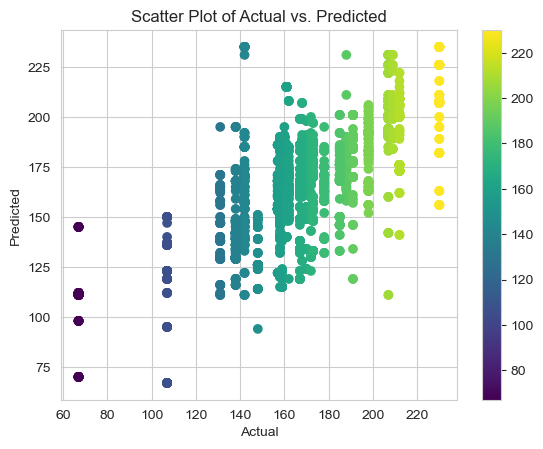

In [187]:
# Assuming you have defined y_test and  y_pred_dt earlier

from matplotlib import pyplot as plt
from matplotlib import cm

# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(y_test,y_pred_dt, c=y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

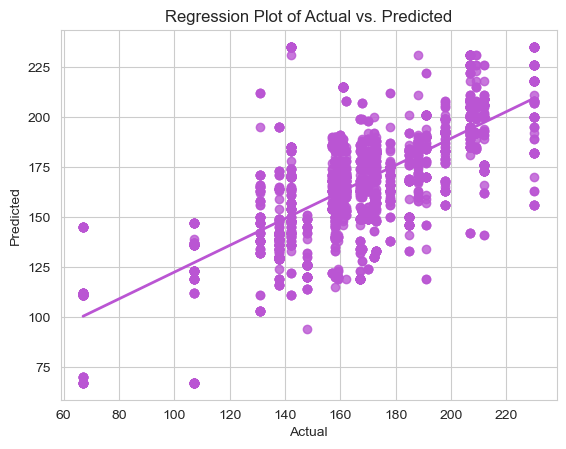

In [132]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=y_test, y= y_pred_dt, ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

In [188]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_dt,'Difference':y_test-y_pred_dt})
pred_df

,Actual Value,Predicted Value,Difference
0,207,194.0,13.0
1,207,194.0,13.0
2,207,194.0,13.0
3,207,160.0,47.0
4,207,111.0,96.0
...,...,...,...
2773,107,112.0,-5.0
2774,107,119.0,-12.0
2775,107,119.0,-12.0
2776,107,112.0,-5.0


### *Random Forest*

In [189]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [190]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [191]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.7760336744489
Mean Squared Error (MSE): 337.1943966200714
Root Mean Squared Error (RMSE): 18.362853716676813


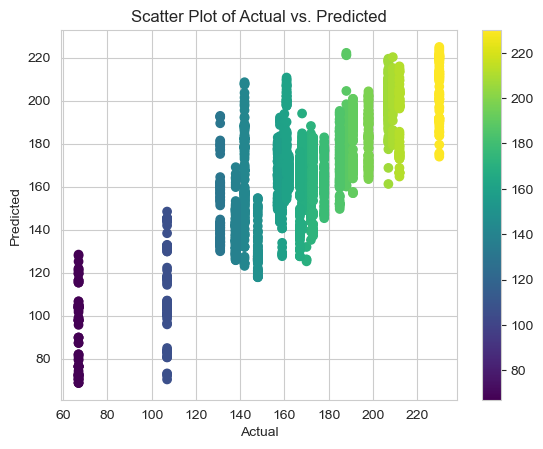

In [192]:
# Assuming you have defined y_test and  y_pred_rf earlier

from matplotlib import pyplot as plt
from matplotlib import cm

# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(y_test,y_pred_rf, c=y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

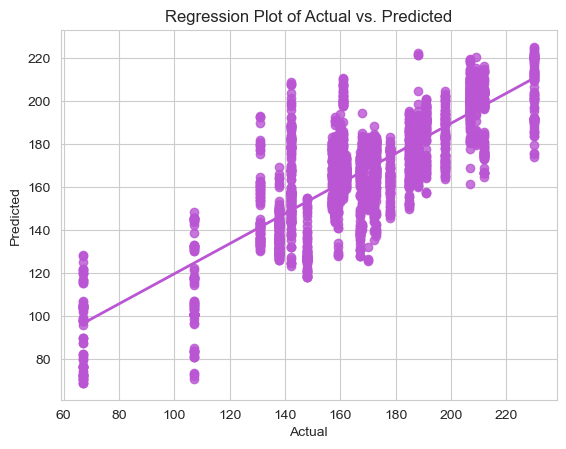

In [193]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=y_test, y= y_pred_rf , ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

In [194]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_rf,'Difference':y_test-y_pred_rf})
pred_df

,Actual Value,Predicted Value,Difference
0,207,182.23,24.77
1,207,183.23,23.77
2,207,186.80,20.20
3,207,190.37,16.63
4,207,197.71,9.29
...,...,...,...
2773,107,116.28,-9.28
2774,107,118.16,-11.16
2775,107,117.65,-10.65
2776,107,115.27,-8.27


# Ridge Regression

In [195]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [196]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

C:\Users\seela\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.44925e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\seela\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.46898e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\seela\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50967e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\seela\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.42329e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\seela\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [197]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487923


In [198]:
prediction=ridge_regressor.predict(X_test)

C:\Users\seela\AppData\Local\Temp\ipykernel_3204\382743513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)
C:\Users\seela\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

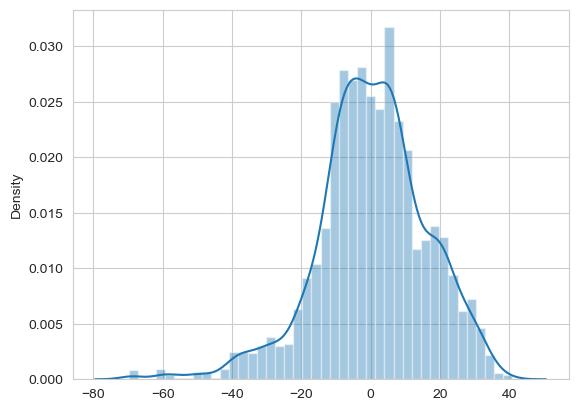

In [144]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [199]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117294527005019
MSE: 251.03172964112733
RMSE: 15.843980864704656


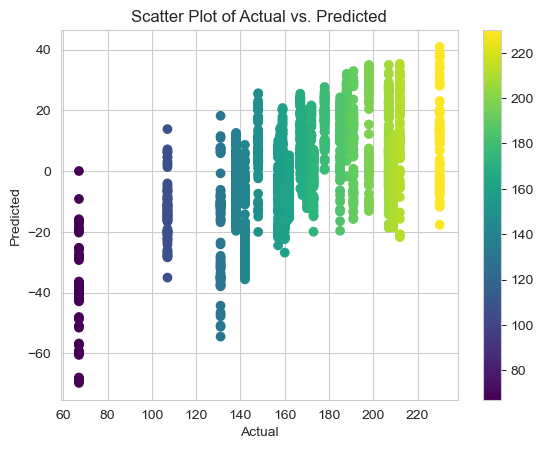

In [200]:
# Assuming you have defined y_test and  y_test-prediction earlier

from matplotlib import pyplot as plt
from matplotlib import cm

# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(y_test,y_test-prediction , c=y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

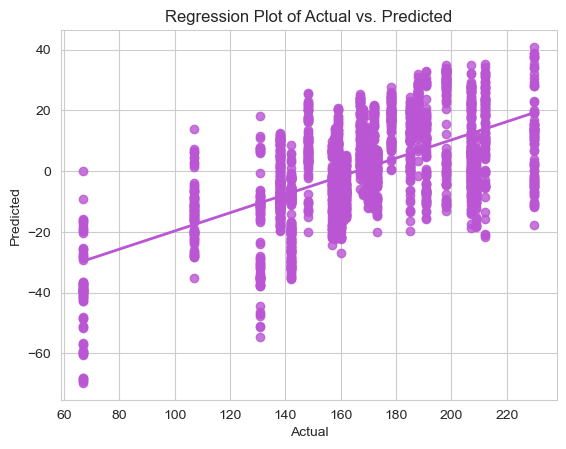

In [201]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=y_test, y=y_test-prediction , ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

In [202]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test-prediction,'Difference':y_test-y_test-prediction})
pred_df

,Actual Value,Predicted Value,Difference
0,207,34.950233,-172.049767
1,207,31.799780,-175.200220
2,207,32.404617,-174.595383
3,207,29.254164,-177.745836
4,207,26.087695,-180.912305
...,...,...,...
2773,107,6.291369,-100.708631
2774,107,5.965391,-101.034609
2775,107,6.586244,-100.413756
2776,107,7.159049,-99.840951


### *AdaBoost Algorithm*

*Note: Since Linear Regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm*

In [203]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(base_estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)

C:\Users\seela\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [204]:
# AdaBoost Regression - Model Evaluation
y_pred_adb = adb_regressor.predict(X_test)
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.184987470764986
Mean Squared Error (MSE): 248.8453661526784
Root Mean Squared Error (RMSE): 15.774833316161486


*Note: Using AdaBoost did not reduce the error to a significant level. Hence, we will use simple linear regression model for prediction*

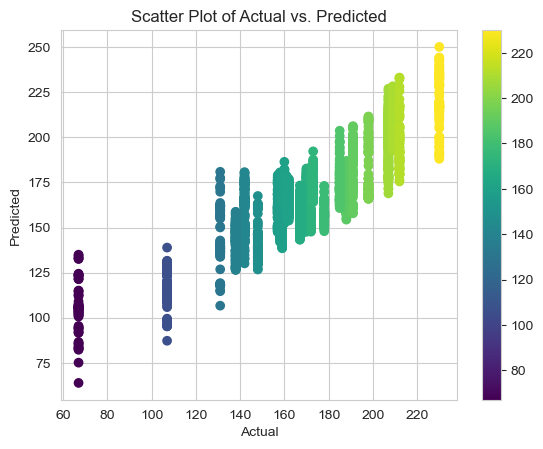

In [205]:
# Assuming you have defined _test and  y_pred_adb earlier

from matplotlib import pyplot as plt
from matplotlib import cm

# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(y_test,  y_pred_adb, c=y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

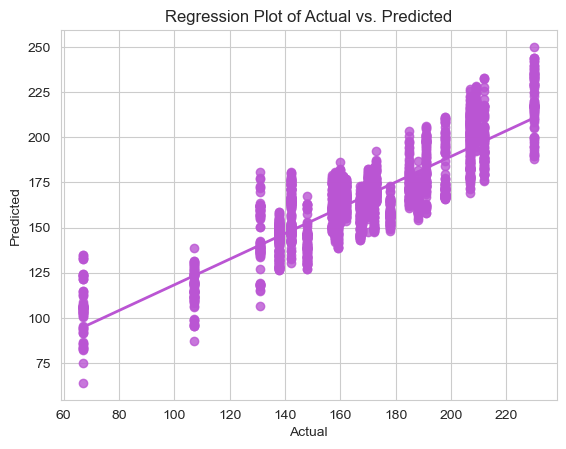

In [206]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=y_test, y= y_pred_adb, ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

In [207]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_adb,'Difference':y_test-y_pred_adb})
pred_df

,Actual Value,Predicted Value,Difference
0,207,168.936237,38.063763
1,207,171.747040,35.252960
2,207,171.363106,35.636894
3,207,174.173909,32.826091
4,207,177.078336,29.921664
...,...,...,...
2773,107,95.472650,11.527350
2774,107,95.840589,11.159411
2775,107,95.363031,11.636969
2776,107,95.166345,11.833655


# Accuracy Comparison

C:\Users\seela\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


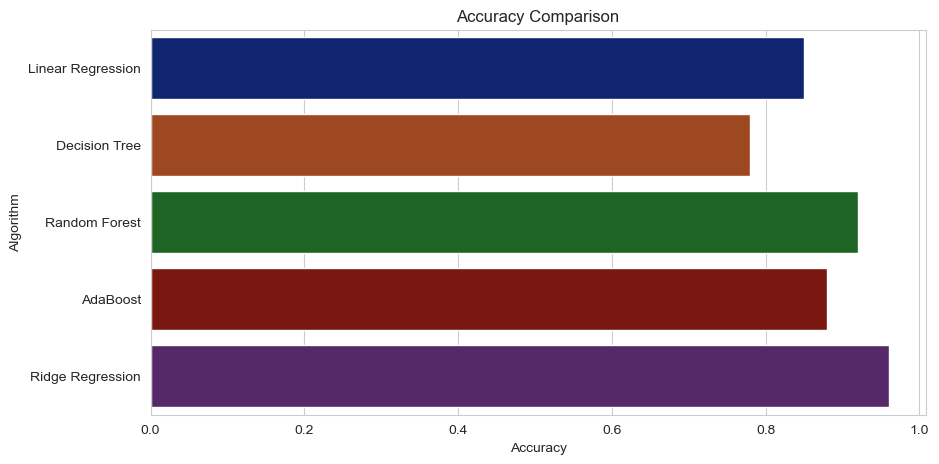

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
# acc = [0.85, 0.78, 0.92, 0.88,0.96]  # Accuracy values
model = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost','Ridge Regression']  # Algorithm names

plt.figure(figsize=[10,5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model, palette='dark')
plt.show()

## **Predictions**
• Model *trained on* the data from **IPL Seasons 1 to 9** ie: (2008 to 2016)<br/>
• Model *tested on* data from **IPL Season 10** ie: (2017)<br/>
• Model *predicts on* data from **IPL Seasons 11 to 12** ie: (2018 to 2019)

In [214]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(ridge_regressor.predict(temp_array)[0])

# Prediction

In [216]:
final_score = predict_score(
    batting_team='Delhi Daredevils', 
    bowling_team='Chennai Super Kings', 
    overs=10, 
    runs=68, 
    wickets=3, 
    runs_in_prev_5=29,
    wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 139 to 154


C:\Users\seela\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


***Note: In IPL, it is very difficult to predict the actual score because in a moment of time the game can completely turn upside down! Still it was a fun project to do... ***

In [ ]:
# Plot Y_pred and Y_test (Scatter Plot of Actual vs. Predicted) 